# **SPRINT 5**. Millora de la fase EDA segons feedback
- Análisis de relación con la variable objetivo: Faltó profundizar en el análisis de la relación entre las características y la variable objetivo, lo cual es crucial para filtrar y definir qué características incluirás en el modelo. Podrías haber incluido la variable depósito recodificada como binaria en el análisis de correlación para detectar posibles relaciones con las variables numéricas. Además, sería útil aplicar un test de Chi-cuadrado (además de las visualizaciones que incluiste) para evaluar las relaciones con las variables categóricas. Al finalizar el EDA, deberías ser capaz de definir, basándote en este análisis, qué variables son más relevantes para conservar en el modelo.

- Colinealidad entre variables: Parece haber una colinealidad moderada entre las variables `pdays` y `previous`. En este caso, podrías considerar incluir solo una de ellas en el modelo para evitar redundancia y mejorar la interpretabilidad.


In [126]:
# Importació de llibrerias necessaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Carregar el dataset amb el que treballarem.
DATASETFILE = "../Data/bank_dataset.csv"
df = pd.read_csv(DATASETFILE)

# Omplim valors faltans segons sprint 5
mediana_age = df["age"].median()        # Calculem la mediana de la caracteristica "age' 
df["age"] = df["age"].fillna(mediana_age)
df["education"] = df["education"].fillna("unknown")
df["marital"] = df["marital"].fillna("unknown")

# Convertim variables tipus yes/no en numèriques 1/0 per tal de calcular la correlació
df["deposit"] = df["deposit"].apply(lambda x : 1 if x == "yes" else 0)
df["loan"] = df["loan"].apply(lambda x : 1 if x == "yes" else 0)
df["housing"] = df["housing"].apply(lambda x : 1 if x == "yes" else 0)
df["default"] = df["default"].apply(lambda x : 1 if x == "yes" else 0)

# Convertim "day" a variable categòrica ja que realment és una etiqueta per calcular Chi-Square
df["day"] = df["day"].apply(lambda x: str(x))

# Info bàsica després de com queda el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  int64  
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  int64  
 7   loan       11162 non-null  int64  
 8   contact    11162 non-null  object 
 9   day        11162 non-null  object 
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  int64  
dtypes: float64(1), int64(9), object(7)
memory usage: 1.4+ MB


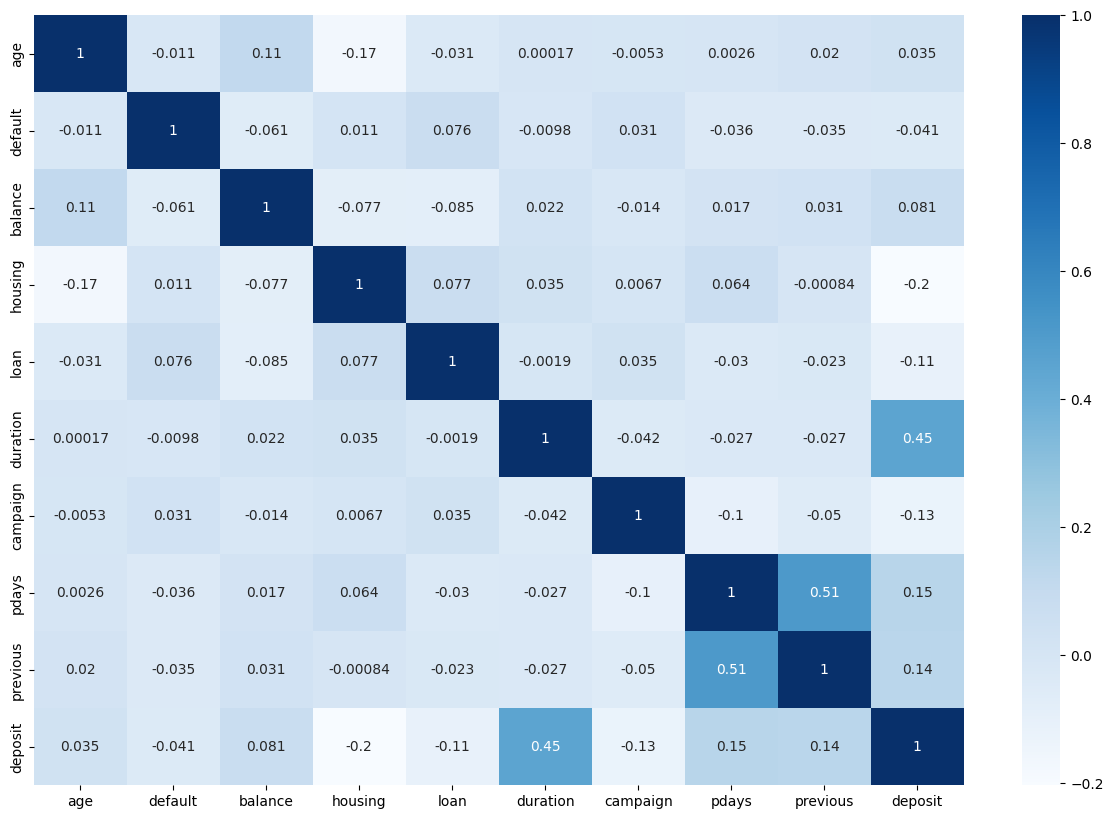

housing    -0.204
campaign   -0.128
loan       -0.111
default    -0.041
age         0.035
balance     0.081
previous    0.140
pdays       0.152
duration    0.452
deposit     1.000
Name: deposit, dtype: float64


In [128]:
# Calculem tabla de correlacions
cross_corr=df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(data=cross_corr, cmap="Blues", annot=True)
plt.show()

print(cross_corr["deposit"].sort_values().round(3))

### Cálcul de Chi-Square de les característiques categóricas amb la variable objectiu "deposit"
- Aplicarem un filtrat per el paràmetre `pvalue` amb un llindar de 0.05 segons recomanacions de la documentació de Chi-Square
    - Si `pvalue` <= 0.05 --> SI hi ha relació entre les variables
    - Si `pvalue` > 0.05  --> NO hi ha relacio entre les variables

In [129]:
# Partim del dataset original
DATASETFILE = "../Data/bank_dataset.csv"
df = pd.read_csv(DATASETFILE)

# Característiques categòriques que volem analitzar
df["day"] = df["day"].apply(lambda x: str(x))                   # Tractarem "day" com variable categòrica (realment és una etiqueta)
col_cat = df.columns[df.dtypes == "object"]
col_cat = col_cat.drop(["loan", "housing", "default"])          # Eliminem variables que tractarem com categóriques binaries (0, 1)
target = "deposit"      


In [130]:
from scipy.stats import chi2_contingency

# Característiques categòriques que volem analitzar i variable objectiu 
col_cat = df.columns[df.dtypes == "object"]
target = "deposit"      

# Anàlisi de Chi-Square
print(f"Relació de '{target}' amb: ")
for col in col_cat:
    
    # Calcular tabla creuada
    crosstab = pd.crosstab(df[col], df[target])
    # print(crosstab)
    
    # Calcular Chi-Square, p-value i dof (degrees-of-freedom)
    chi2, pvalue, dof, expected = chi2_contingency(crosstab)
    print(f"\t'{col}':  \tChi-Square: {chi2:.2f}, p-valor: {pvalue:.3f}, dof: {dof}")


Relació de 'deposit' amb: 
	'job':  	Chi-Square: 378.08, p-valor: 0.000, dof: 11
	'marital':  	Chi-Square: 108.96, p-valor: 0.000, dof: 2
	'education':  	Chi-Square: 122.93, p-valor: 0.000, dof: 3
	'default':  	Chi-Square: 17.81, p-valor: 0.000, dof: 1
	'housing':  	Chi-Square: 463.19, p-valor: 0.000, dof: 1
	'loan':  	Chi-Square: 135.83, p-valor: 0.000, dof: 1
	'contact':  	Chi-Square: 736.69, p-valor: 0.000, dof: 2
	'day':  	Chi-Square: 363.90, p-valor: 0.000, dof: 30
	'month':  	Chi-Square: 1046.77, p-valor: 0.000, dof: 11
	'poutcome':  	Chi-Square: 1004.64, p-valor: 0.000, dof: 3
	'deposit':  	Chi-Square: 11157.99, p-valor: 0.000, dof: 1


### Conclusions i accions:
- Hi ha una correlació moderada (0,51) entre `previous` i `pdays`: Deixem `pdays` ja que te una correlació amb `deposit` una mica major que `pdays` (0.15 vs 0.14)
- Eliminem la variable `age` ja que la correlació amb `deposit` es molt baixa (0.034)
- Eliminem la variable `default` ja que la correlació amb `deposit` es molt baixa (0.040). De fet, aquesta variable està molt desbalancejada, ja que mes del 98% dels clients NO estan en default i per tant el seu ratio `deposit==yes/deposit==no` es gairabé el mateix que el ratio general, el que no permetrà extreure conclusions.
- Segons l'anàlisi Chi-Square no podem descartar cap variable categórica, ja que tots el `pvalue` han sortir menors que 0.05
- Apliquem també la resta de transformacions i eliminacions ja previstes en el sprint 5 (binning, agrupacions, eliminacions...)

### Definim funcions auxiliars per claretat i eficiència en el codi

In [131]:
# Definim la funció que aplica EDA a un dataframe 
def apply_eda_to_df(df, stats):
    '''
    Aplica tots els processos de EDA al dataframe de entrada
    Permet fer el codi mes clar i eficient
    Entrada:
        df: dataframe original
    Sortida:
        df: dataframe modificat amb el processos EDA
    '''
    # Omplim valors faltans
    age_mediana = stats["age_mediana"]
    df["age"] = df["age"].fillna(age_mediana)
    df["education"] = df['education'].fillna("unknown")
    df["marital"] = df["marital"].fillna("unknown")

    # Binning de la variable "day" ([1-10]->"begin", [11-20]->"mid", [21-31]->"end")
    df["day"] = df["day"].apply(lambda x: "begin" if x <= 10 else ("mid" if x <= 20 else "end"))

    # Binning de la variable "balance"
    q75 = stats["balance_q75"]
    df["balance"] = df["balance"].apply(lambda x: 0 if x <= q75 else 1)

    # Binning de la la variable "campaign"
    q75 = stats["campaign_q75"]
    q95 = stats["campaign_q75"]
    df["campaign"] = df["campaign"].apply(lambda x: 0 if x <= q75 else (1 if x <= q95 else 2))

    # Binning de la variable "pdays"
    q75 = stats["pdays_q75"]
    df["pdays"] = df["pdays"].apply(lambda x: 0 if x == -1 else (1 if x <= q75 else 2))

    # Agrupació de categories a la variable "poutcome"
    df["poutcome"] = df["poutcome"].replace({"other" : "unknown"})

    # Eliminem les variables que hem identificat com menys importants o són redundants
    col_del = ["duration", "previous", "age", "default"]
    df.drop(col_del, axis=1, inplace=True)

    return df


# Definim la funció que calcula les estadistiques de un dataframe per aplicar EDA 
# Això ens permetrà fer un codi més eficient en la fase de separació Train/Test
def calculate_stats (df):
    ''' 
    Calcula les estadistiques necesaries per el processament EDA del dataset
    Entrada:
        df: DataFrame
    Sortida:
        stats: dictionari amb les estadistiques necesaries per aplica EDA
    '''
    return {"age_mediana"  : df['age'].median(),
             "balance_q75"  : df["balance"].quantile(0.75),
             "campaign_q75" : df["campaign"].quantile(0.75),
             "campaign_q95" : df["campaign"].quantile(0.95),
             "pdays_q75"    : df["pdays"].quantile(0.75)
             }

### Carreguen el dataset de entrada i apliquem EDA

In [132]:
# Carreguem el dataset original amb el que treballarem 
DATASETFILE = "../Data/bank_dataset.csv"
df = pd.read_csv(DATASETFILE)

# Calculem les estadistiques d'aquest dataset
stats = calculate_stats(df)

# Apliquem EDA al dataset
df = apply_eda_to_df(df, stats)

In [133]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,4,married,6349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,0.249955,0.433006,0.0,0.0,0.0,0.0,1.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162,3,mid,4482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,11162,12,may,2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,11162.0,NaN,NaN,NaN,0.361046,0.76928,0.0,0.0,0.0,0.0,2.0


### Desem el nou dataset en format CSV amb un nou nom

In [134]:
# Desem el nou dataset en format CSV
DATASETFILE = "../Data/bank_dataset_eda.csv"
df.to_csv(DATASETFILE)

# **SPRINT 6**. Projecte individual. Entrenament i proves.

![Etapes de preprocessament.png](<attachment:Etapes de preprocessament.png>)
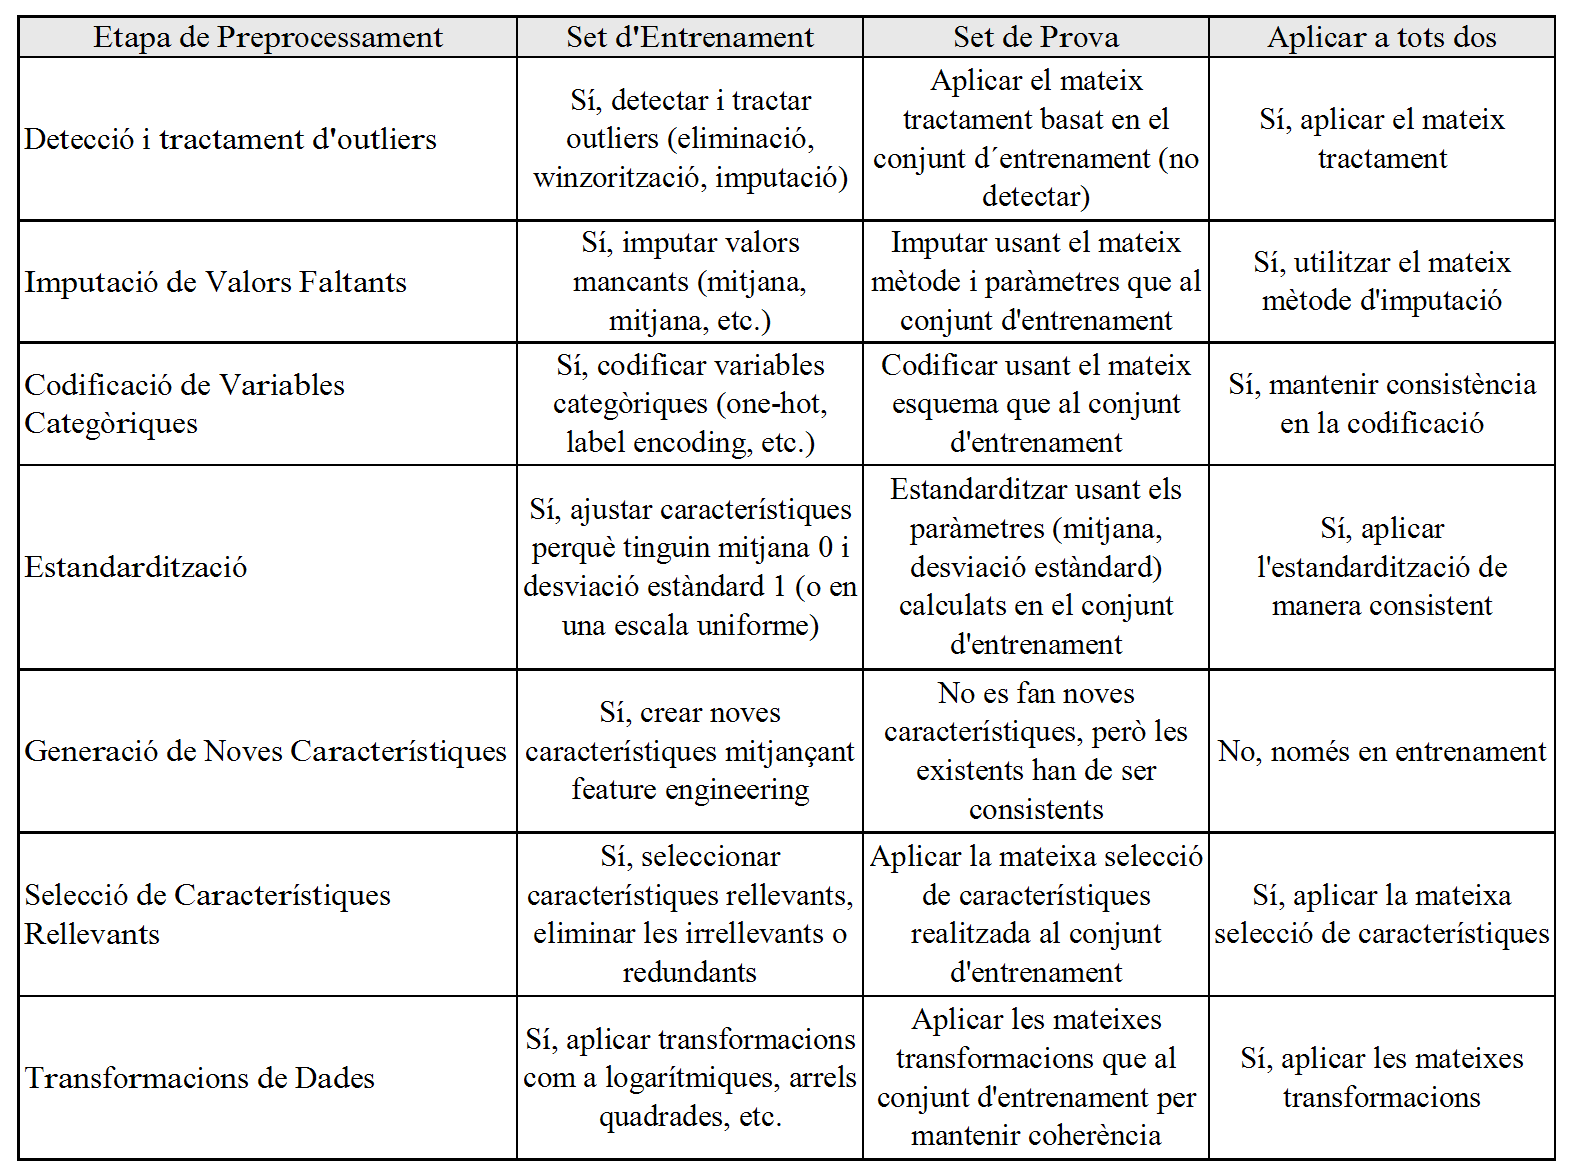

### Importació de les llibreries necesàries

In [135]:
# Importació de llibrerias necessaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

### Repartiment Train/Test
- Partim del dataset original i separem en datasets 'Train/Test' les varibles d'entrades i la variable objectiu
- Donat que no farem validació durant l'entrenament, considerem que una repartició Train/Test del 70-30 es el més adient.
- La separacion es aleatoria (shuffle=True) però repetible (random_state=42)
- Assegurem que mantenint la ràtio de la variable objectiu  (stratify=y)

In [136]:
# Partim del dataset original
DATASETFILE = "../Data/bank_dataset.csv"
df = pd.read_csv(DATASETFILE)

# Separa dataframes de variables d'entrada i variable objectiu
target = "deposit"                          # Columna target
X = df.drop(target, axis=1)                 # Dataframe de caracteristiques d'entrada
y = df[target]                              # Dataframe de la variable objectiu

# Separem en Train/Test les entrades i la variable objectiu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

### Comprovació de les ràtios Test/Train i de l'estratificació

In [137]:
# Comprovació de les ràtios Test/Train i de l'estratificació
print(f"Ràtio Train/Total: {100*X_train.shape[0] / X.shape[0]:.2f} %")
print(f"Ràtio Test/Total: {100*X_test.shape[0] / X.shape[0]:.2f} %")
print()
print(f"Ràtio 'yes/no' en 'y': {(((y == 'yes').sum() ) / ((y == 'no').sum())):.2f}")
print(f"Ràtio 'yes/no' en 'train': {(((y_train == 'yes').sum() ) / ((y_train == 'no').sum())):.2f}")
print(f"Ràtio 'yes/no' en 'test': {(((y_test == 'yes').sum() ) / ((y_test == 'no').sum())):.2f}")
print()
print(df["deposit"].describe())
print()
print(y_train.describe())
print()
print(y_test.describe())

Ràtio Train/Total: 70.00 %
Ràtio Test/Total: 30.00 %

Ràtio 'yes/no' en 'y': 0.90
Ràtio 'yes/no' en 'train': 0.90
Ràtio 'yes/no' en 'test': 0.90

count     11162
unique        2
top          no
freq       5873
Name: deposit, dtype: object

count     7813
unique       2
top         no
freq      4111
Name: deposit, dtype: object

count     3349
unique       2
top         no
freq      1762
Name: deposit, dtype: object


### Apliquem el procassament EDA als datasets Train i Test
- Calcula les estadistiques necesaries sobre el dataset "X_Train" per aplicar EDA sobre tots dos datasets d'entrada
- Apliquem les mateixes estadistiques tant a "X_train" como "X_test" per mantenir la consistencia i evitar fugues

In [138]:
# Calcula les estadistiques necesaries per aplicar EDA sobre els dataframes
# Apliquem les mateixes estadistiques tant a "X_train" como "X_test" per mantenir la consistencia i evitar fugues
stats = calculate_stats(X_train)
X_train = apply_eda_to_df(X_train, stats)
X_test = apply_eda_to_df(X_test, stats)

In [139]:
X_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job,7813,12,management,1822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,7813,4,married,4450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,7813,4,secondary,3824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,7813.0,NaN,NaN,NaN,0.249968,0.433022,0.0,0.0,0.0,0.0,1.0
housing,7813,2,no,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,7813,2,no,6810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,7813,3,cellular,5620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,7813,3,mid,3134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,7813,12,may,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,7813.0,NaN,NaN,NaN,0.354537,0.763841,0.0,0.0,0.0,0.0,2.0


In [140]:
X_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job,3349,12,management,744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,3349,4,married,1899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,3349,4,secondary,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,3349.0,NaN,NaN,NaN,0.251418,0.433893,0.0,0.0,0.0,1.0,1.0
housing,3349,2,no,1766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,3349,2,no,2892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,3349,3,cellular,2422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,3349,3,mid,1348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,3349,12,may,815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,3349.0,NaN,NaN,NaN,0.376232,0.781726,0.0,0.0,0.0,0.0,2.0


In [141]:
y_train.describe().T
# Compte! 'y_train' es tipus 'Series'

count     7813
unique       2
top         no
freq      4111
Name: deposit, dtype: object

In [142]:
y_test.describe().T
# Compte! 'y_train' es tipus 'Series'

count     3349
unique       2
top         no
freq      1762
Name: deposit, dtype: object

### Codificació de les variables categòriques 
- Un cop aplicat EDA, resten les següents variables categòriques d'entrada: 
    - `job`, `marital`, `education`, `housing`, `loan`, `contact`, `day`, `month`, `poutcome` 
- Definim la funció `encode_categorical_X` per la codificació de les variables categòriques d'entrada. La codificació ha de ser consistent en tots els dataframes de variables d'entrada amb els que treballem (Train, Test). Las transformacións que farem seràn les següents: 
    - `job`: creació la nova categoria 'job_level', reducció a 3 categories (low, mid, high) i codificació 'ordinal encoding' ja que hi una distancia entre les noves categories:
        - "low": el mes probable es que no tinguin ingressos
        - "mid": el mes probable es que tinguin ingressos mitjos
        - "high": el mes probable es que tinguin ingressos alts
    - `education`: codificació 'ordinal encoding' ja que hi ha una distancia entre les categories. La categoria més baixa serà 'unknown' (probablement correspon a estudis primaris no completats) i la mes alta 'tertiary' (probablement correspon a estudis universitaris).
    - `marital`, `contact`, `poutcome`: codificació 'one-hot encoding' ja que no es veu la possibilitat de reducció de les categories i no hi una relació de distancia entre les seves categories.
    - `housing`, `loan`: totes dues son binaries tipus 'yes/no' i per tant es codificaran com 'ordinal encoding' ja que és mes eficient que 'one-hot encoding' (1 columna vs. 2 columnes)
    - `day`: reducció a 3 categories (begin, mid, end) depenen si es principi, mitjans o finals del mes i codificació 'one-hot encoding' ja que no hi una relació de distancia entre les noves categories. Pasem de 31 categories a 3 i mantenim part de la informació temporal.
    - `month`: creació de la nova categoria 'quarter' per reduir a 4 categories de quadrimestres (Q1, Q2, Q3, Q4) i codificació 'one-hot encoding' ja que no hi una relació de distancia entre les noves categories (es redueixen de 12 a 4 categories i es mantè part de la informació d'estacionalitat).
    - `duration`, `previous`, `age`, `default`: ja s'han eliminat en la fase EDA i no caldrà fer res.

- Per la codificació de la variable objectiu definim la funció `encode_categorical_y`: 
    - `deposit`:  apliquem una codificació 'ordinal encoding' ja que es binaria tipus 'yes/no'.

### Definim funcions de codificació categòrica per claretat i eficiència del codi

In [112]:
# Codificació de les variables categòriques d'entrada:
def encode_categorical_X(df):
    '''
    Codificació de les variables categóriques
    Entrada:
        df: dataframe de variables d'entrada
    Sortida:
        df: dataframe codificat
    '''
# "job": Reducció de 12 categories a 3. 
    job_map = {
        "student"       : "low",
        "unemployed"    : "low",
        "housemaid"     : "low",
        "unknown"       : "low",
        "admin."        : "mid", 
        "services"      : "mid",
        "retired"       : "mid",
        "blue-collar"   : "mid",
        "entrepreneur"  : "mid",
        "self-employed" : "mid",
        "technician"    : "high", 
        "management"    : "high"
    }
    df["job_level"] = df["job"].replace(job_map)    # Crea la nova categoria
    # df.drop("job", axis=1, inplace=True)            # Elimina la categoria antiga

    # Reducció de 12 categorias a 4, mantenint part de la estacionalitat
    # Codificarem amb "one-hot" ja que no hi ha distancia de relació entre categories
    month_map = {
        "jan" : "Q1", 
        "feb" : "Q1", 
        "mar" : "Q1",
        "apr" : "Q2", 
        "may" : "Q2", 
        "jun" : "Q2",
        "jul" : "Q3", 
        "aug" : "Q3", 
        "sep" : "Q3",
        "oct" : "Q4", 
        "nov" : "Q4", 
        "dec" : "Q4"
    }
    df["quarter"] = df["month"].replace(month_map)  # Crea la nova categoria
    # df.drop("month", axis=1, inplace=True)          # Elimina la categoria antiga

    col_to_one_hot = [
        "marital", 
        "contact", 
        "poutcome", 
        "day", 
        "quarter"
    ]
    df = pd.get_dummies(df, columns=col_to_one_hot)

    col_to_ordinal = {
        "job_level" : ["low", "mid", "high"],
        "education" : ["unknown", "primary", "secondary", "tertiary"],
        "housing"   : ["no", "yes"],
        "loan"      : ["no", "yes"],
    }
    encoder = OrdinalEncoder(categories=list(col_to_ordinal.values()))
    df[list(col_to_ordinal.keys())] = encoder.fit_transform(df[list(col_to_ordinal.keys())])

# Eliminem del dataframe les caracteristiques categòriques que ja no son necessàries
    col_to_remove = ["job", "month"]
    for col in col_to_remove:
        df.drop(col, axis=1, inplace=True)

    return df



def encode_categorical_y(df):
    '''
    Codificació de les variables categóriques
    Entrada:
        df: dataframe de variables objectiu
    Sortida:
        df: dataframe codificat
    '''
    col_to_ordinal = {
        "deposit" : ["no", "yes"],
    }
    encoder = OrdinalEncoder(categories=list(col_to_ordinal.values()))
    df[list(col_to_ordinal.keys())] = encoder.fit_transform(df[list(col_to_ordinal.keys())])

    return df

### Apliquem les codificacions a les variables categòriques

In [143]:
# Apliquem les codificacions a les variables categòriques
X_test = encode_categorical_X(X_test)
X_train = encode_categorical_X(X_train)
y_train = encode_categorical_y(y_train.to_frame())
y_test = encode_categorical_y(y_test.to_frame())

### Codificació de les variables numèriques
- Durant la fase EDA de eliminació de *outliers* i reducció de dimensionalitat, les variables numèriques:
    - S'han eliminat els outliers i s'ha fet un *binning* per reduir dimensionalitat (casos `balance`, `pdays`, `campaign`).
    - s'han convertit en categòriques i s'han tractat a l'apartat anterior (cas de `day` que realment era una etiqueta)
    - s'han eliminat en fase EDA per la baixa correlació amb la variable objectiu (casos `duration`, `age`)
    - s'han eliminat en fase EDA per redundancia amb altres variables (cas `previous`)
- Per tant no resten variables numèriques a les que aplicar una codificació como ara estandarització o escalat

### Desem els nous datasets en format CSV en la carpeta de dades

In [144]:
# Desem els nous datasets en format CSV en la carpeta de dades
FILEPATH = "../Data/bank_dataset_"
X_train.to_csv(FILEPATH + "X_train.csv")
X_test.to_csv(FILEPATH + "X_test.csv")
y_train.to_csv(FILEPATH + "y_train.csv")
y_test.to_csv(FILEPATH + "y_test.csv")    